In [1]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras
%matplotlib inline

/Users/panxiao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
t0 = time()

train_data = pd.read_csv("data/training.csv")
test_data = pd.read_csv("data/test.csv")

print ("Done in %0.3fs." % (time() - t0))

Done in 11.705s.


In [3]:
train_data.dtypes

auction_id                      object
timestamp                        int64
creative_duration                int64
creative_id                      int64
campaign_id                      int64
advertiser_id                  float64
placement_id                     int64
placement_language              object
website_id                       int64
referer_deep_three              object
ua_country                      object
ua_os                           object
ua_browser                      object
ua_browser_version             float64
ua_device                       object
user_average_seconds_played    float64
seconds_played                   int64
dtype: object

In [4]:
train_data.count()

auction_id                     3000000
timestamp                      3000000
creative_duration              3000000
creative_id                    3000000
campaign_id                    3000000
advertiser_id                  2958556
placement_id                   3000000
placement_language             2999811
website_id                     3000000
referer_deep_three             2963303
ua_country                     2999986
ua_os                          3000000
ua_browser                     3000000
ua_browser_version             2399960
ua_device                      2999802
user_average_seconds_played    1099705
seconds_played                 3000000
dtype: int64

In [5]:
test_data.count()

auction_id                     1000000
timestamp                      1000000
creative_duration              1000000
creative_id                    1000000
campaign_id                    1000000
advertiser_id                   988902
placement_id                   1000000
placement_language              999814
website_id                     1000000
referer_deep_three              980011
ua_country                      999993
ua_os                          1000000
ua_browser                     1000000
ua_browser_version              800478
ua_device                       999961
user_average_seconds_played     361575
dtype: int64

In [6]:
train_data.describe()

timestamp  creative_duration   creative_id   campaign_id  \
count  3.000000e+06       3.000000e+06  3.000000e+06  3.000000e+06   
mean   1.517319e+09       2.910934e+01  1.990696e+05  2.119606e+05   
std    2.396673e+04       2.109566e+01  7.107768e+03  7.470406e+03   
min    1.517270e+09       5.000000e+00  1.213690e+05  1.243910e+05   
25%    1.517300e+09       1.400000e+01  1.988620e+05  2.113480e+05   
50%    1.517322e+09       2.800000e+01  2.012290e+05  2.137830e+05   
75%    1.517339e+09       3.000000e+01  2.018620e+05  2.146310e+05   
max    1.517357e+09       1.350000e+02  2.029200e+05  2.158850e+05   

       advertiser_id  placement_id    website_id  ua_browser_version  \
count   2.958556e+06  3.000000e+06  3.000000e+06        2.399960e+06   
mean    4.665226e+03  5.790617e+04  3.218541e+04        3.662273e+01   
std     2.919001e+03  1.791304e+04  1.003381e+04        2.644128e+01   
min     6.250000e+02  1.874900e+04  1.432100e+04        0.000000e+00   
25%     1.768000e+03  4.495100e+04  2.346300e+04        1.100000e+01   
50%     3.774000e+03  6.194800e+04  3.247900e+04        4.100000e+01   
75%     7.452000e+03  7.240800e+04  4.121400e+04        6.300000e+01   
max     9.322000e+03  8.765900e+04  5.159200e+04        4.127000e+03   

       user_average_seconds_played  seconds_played  
count                 1.099705e+06    3.000000e+06  
mean                  1.004955e+01    6.967639e+00  
std                   9.053615e+00    9.054720e+00  
min                   0.000000e+00    0.000000e+00  
25%                   3.375000e+00    1.000000e+00  
50%                   8.500000e+00    4.000000e+00  
75%                   1.466667e+01    1.100000e+01  
max                   2.250000e+02    1.350000e+02

### Creative duration

Text(0,0.5,'count')

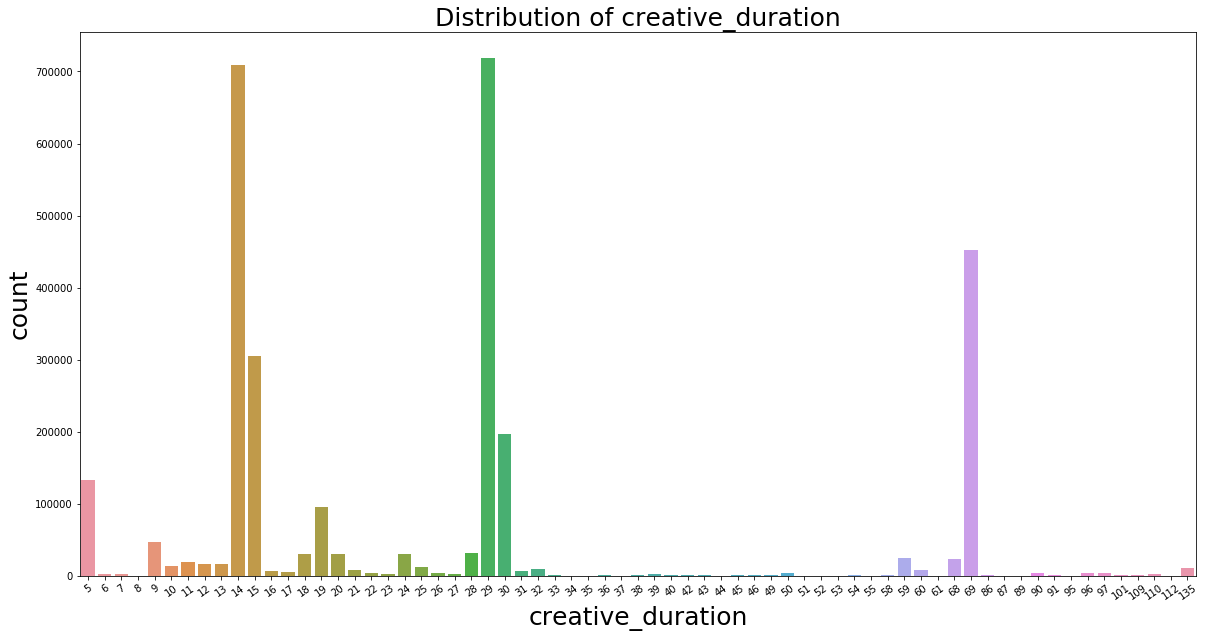

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(x="creative_duration", data=train_data, orient="v")
ax.set_title('Distribution of creative_duration',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

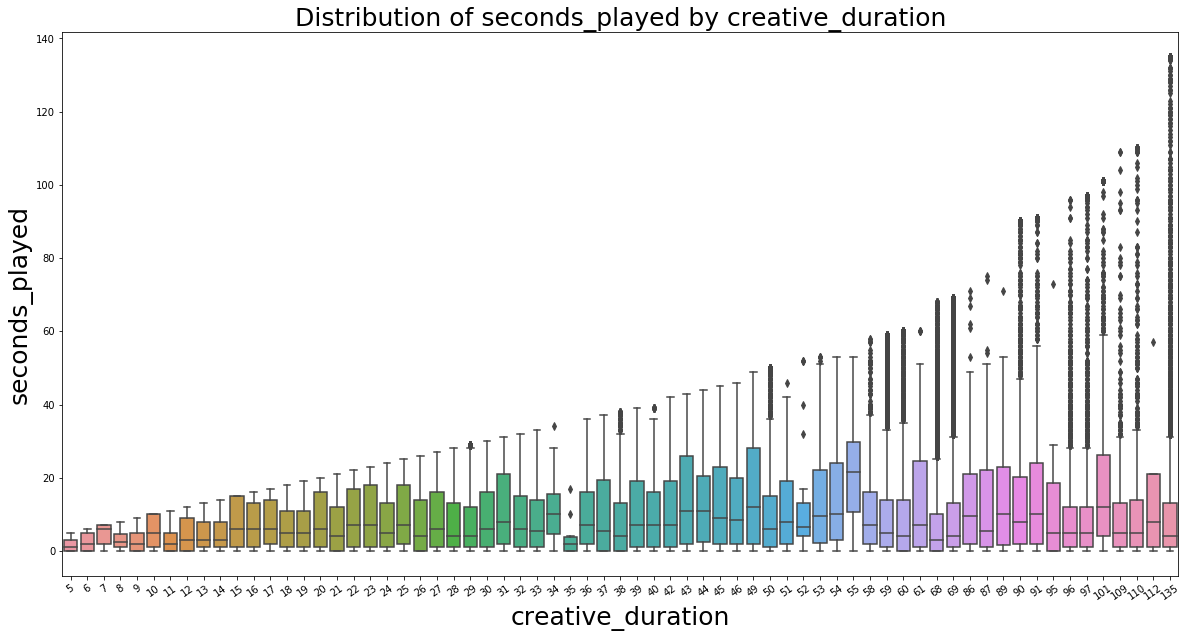

In [8]:
grouped = train_data.groupby('creative_duration')['seconds_played']
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x='creative_duration', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by creative_duration',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

In [9]:
train_data

auction_id   timestamp  creative_duration  \
0        0008b046-b675-4f51-8ad6-fe06e5d81f8e  1517334694                 25   
1        00095bac-8fec-48c8-a17b-8f3878359e1d  1517270483                 29   
2        000c4c0c-0789-4e50-8ba6-a4be920ab482  1517339899                 60   
3        000db509-3350-4cd9-b60a-d506fbd31f29  1517346542                 29   
4        001300de-8eda-480f-bec8-4b46ef6117f2  1517310926                 29   
5        001734f7-13d2-482c-97d2-f5777d5f123c  1517328797                 14   
6        00189c24-119d-4771-8f8d-7bb865202066  1517331693                  5   
7        001a05ad-8fac-4bf8-9561-e85d4de1aea4  1517353849                 15   
8        001d8a28-10df-4d65-b92c-c580006c17a5  1517281693                  5   
9        001f5452-c7f5-4b57-9681-3aba9350e1fd  1517320092                 28   
10       002a6a68-b0d4-4f95-a7f0-f73230c81fd4  1517302172                 69   
11       002bd4de-10e4-4675-96a3-0eaee3d015ee  1517334994                 69   
12       002cd63c-cefc-4285-b236-7c1eb794cf38  1517352193                 20   
13       00307693-6794-4397-813f-0a3d9c2cdf2a  1517286979                 69   
14       0030ae38-1697-4dd7-8ea9-8c2f0994d9c8  1517353896                 14   
15       0031298e-d90b-43b6-aace-de9b11e17e0c  1517348855                 15   
16       003435d6-20da-4685-aa7c-29a08ba8b1bd  1517342686                 29   
17       0034bbe8-371a-47ce-a7f6-712df1a1ea40  1517319996                 14   
18       003657cd-350b-4a3f-875c-3ad6d381701c  1517292981                 19   
19       00383e2f-0586-4f30-9813-234b0c60c793  1517311263                 20   
20       0038aaba-9f07-4997-8905-854858115e9a  1517342690                 30   
21       0038df56-f367-464a-972d-841a260547ea  1517340288                 14   
22       00400a28-46d1-4e22-8753-22744cc00ad2  1517317750                 19   
23       00427c72-fa05-41d1-ba19-3428bb8b4aee  1517345685                  9   
24       004ad831-5701-4328-8c75-051a6d6735b7  1517273055                 29   
25       004c3147-ebf5-4c60-b521-3898b6a51499  1517275878                 69   
26       004d1897-ca4d-4ee0-b4fe-9a55af2c2666  1517318268                 14   
27       00537590-f5a6-4cc2-aaef-88aa99066741  1517300962                 69   
28       0054bc7a-2603-4733-ab7a-94e41e7fbb2c  1517335882                 90   
29       0055f6ce-ab21-43d2-8181-beaf7bc797e0  1517273779                 15   
...                                       ...         ...                ...   
2999970  34d1ad81-6b20-4001-856c-05cf7370cb7c  1517353526                 29   
2999971  34d1c8a7-a02d-4a48-ac87-c48f6e63e15d  1517272281                 15   
2999972  34d1dcb0-a8fb-44d3-8a10-92d064c91d79  1517297593                 14   
2999973  34d2e981-82f9-4492-8053-1915841155f7  1517272575                 29   
2999974  34d315a7-cbeb-40f4-990a-64cd93567589  1517337654                 69   
2999975  34d36ed7-29df-43ac-a362-56a7da7df166  1517283470                 15   
2999976  34d53f1c-405a-42a7-9689-bf8c909cc2d2  1517339269                 14   
2999977  34d58423-09e1-43f8-8e84-8c16808de9be  1517314744                 69   
2999978  34d7d13d-060a-4705-93db-fe7c33357107  1517338040                 29   
2999979  34d82383-dedd-40f4-ba42-22df16fdd876  1517343156                 14   
2999980  34d97657-6d73-4a3e-88e8-825e8a3da210  1517277686                  5   
2999981  34dba55b-e3d8-4a43-acaf-c5448545699e  1517312730                 29   
2999982  34e04944-35bf-4e0e-a596-b3513be6899b  1517349143                 14   
2999983  34e59e35-a64f-4419-a824-32a2bd1e29e2  1517351526                  9   
2999984  34e65d40-e4bc-4397-b915-fd2c79f89b7c  1517310132                 19   
2999985  34e7964e-9757-4504-8df0-909cd6f2857e  1517317632                 29   
2999986  34e9640b-2880-4f72-bb69-ac2ef7032b14  1517272973                 68   
2999987  34e9fcf9-704c-4a86-abae-c602c7d82f32  1517353356                 15   
2999988  34ec596e-70fe-4037-b742-aa

### Creative ID

Text(0,0.5,'count')

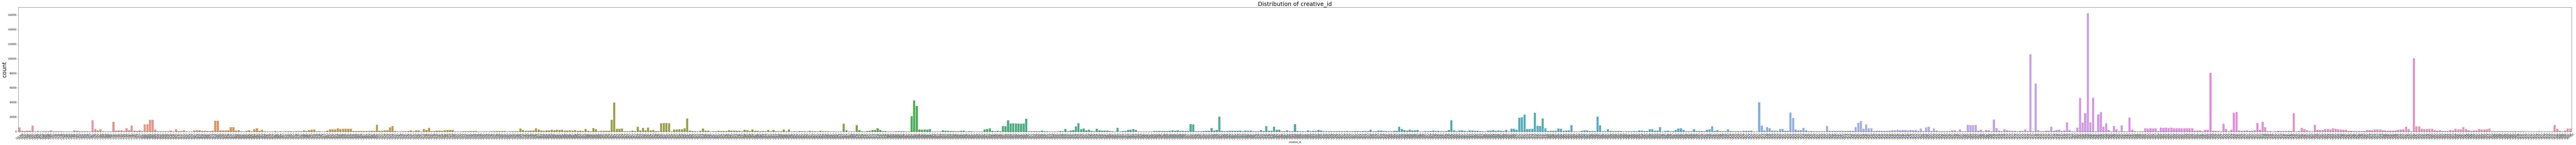

In [10]:
fig, ax = plt.subplots(figsize=(200, 10))
ax = sns.countplot(x="creative_id", data=train_data, orient="v")
ax.set_title('Distribution of creative_id',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=10)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

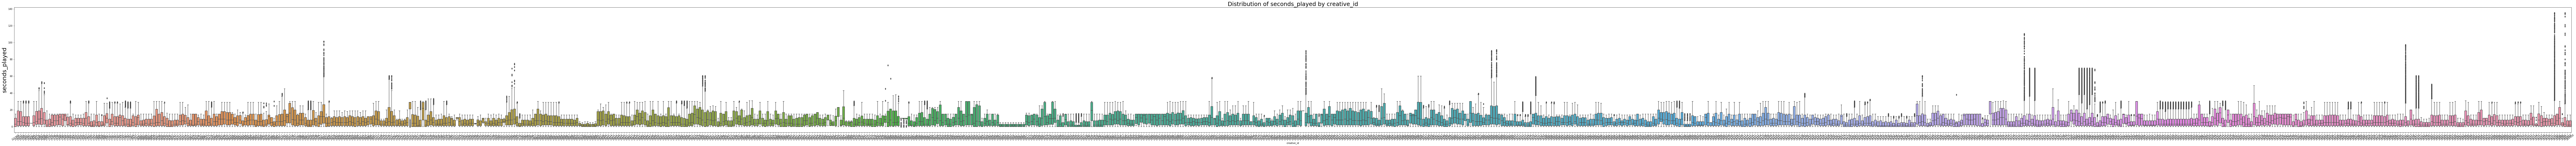

In [11]:
grouped = train_data.groupby('creative_id')['seconds_played']
fig, ax = plt.subplots(figsize=(200, 10))
ax = sns.boxplot(x='creative_id', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by creative_id',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=10)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

### Campaign ID

Text(0,0.5,'count')

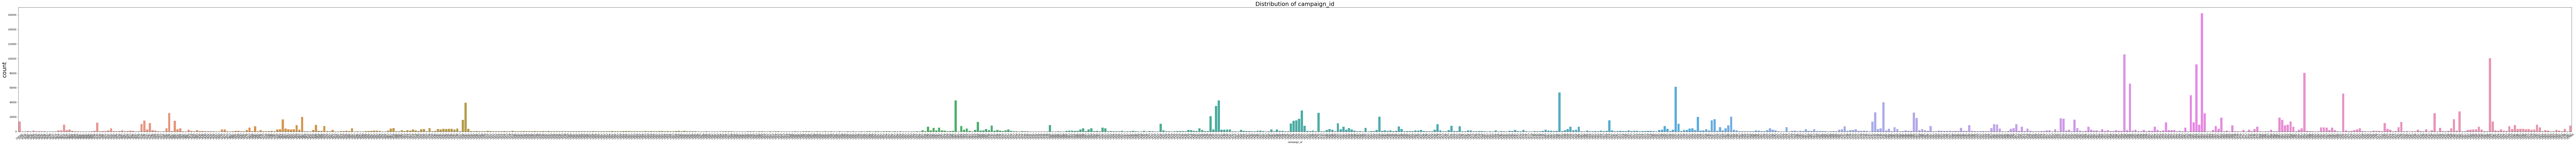

In [12]:
fig, ax = plt.subplots(figsize=(200, 10))
ax = sns.countplot(x="campaign_id", data=train_data, orient="v")
ax.set_title('Distribution of campaign_id',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=10)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

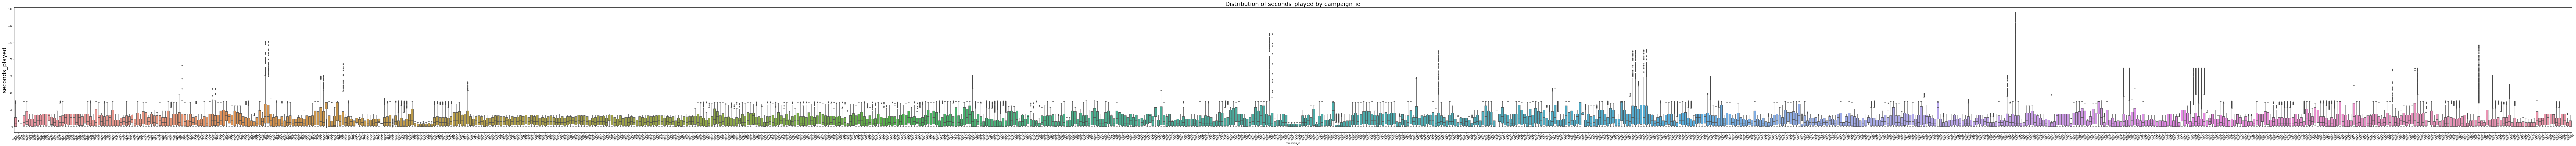

In [13]:
grouped = train_data.groupby('campaign_id')['seconds_played']
fig, ax = plt.subplots(figsize=(200, 10))
ax = sns.boxplot(x='campaign_id', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by campaign_id',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=10)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

### Advertiser ID

Text(0,0.5,'count')

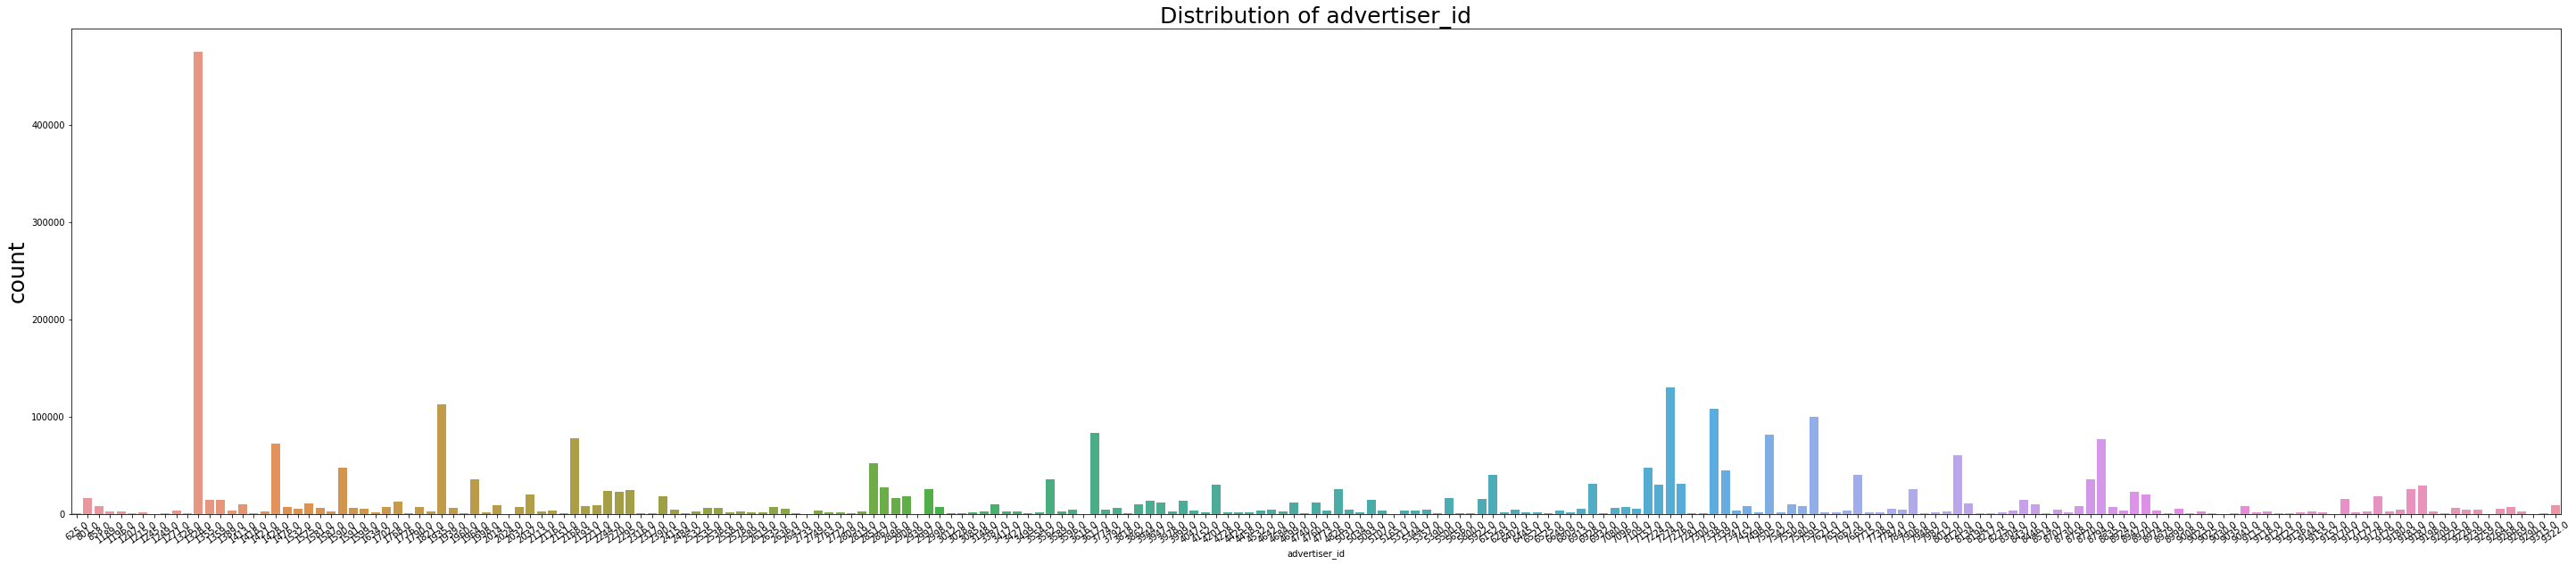

In [14]:
fig, ax = plt.subplots(figsize=(50, 10))
ax = sns.countplot(x="advertiser_id", data=train_data, orient="v")
ax.set_title('Distribution of advertiser_id',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=10)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

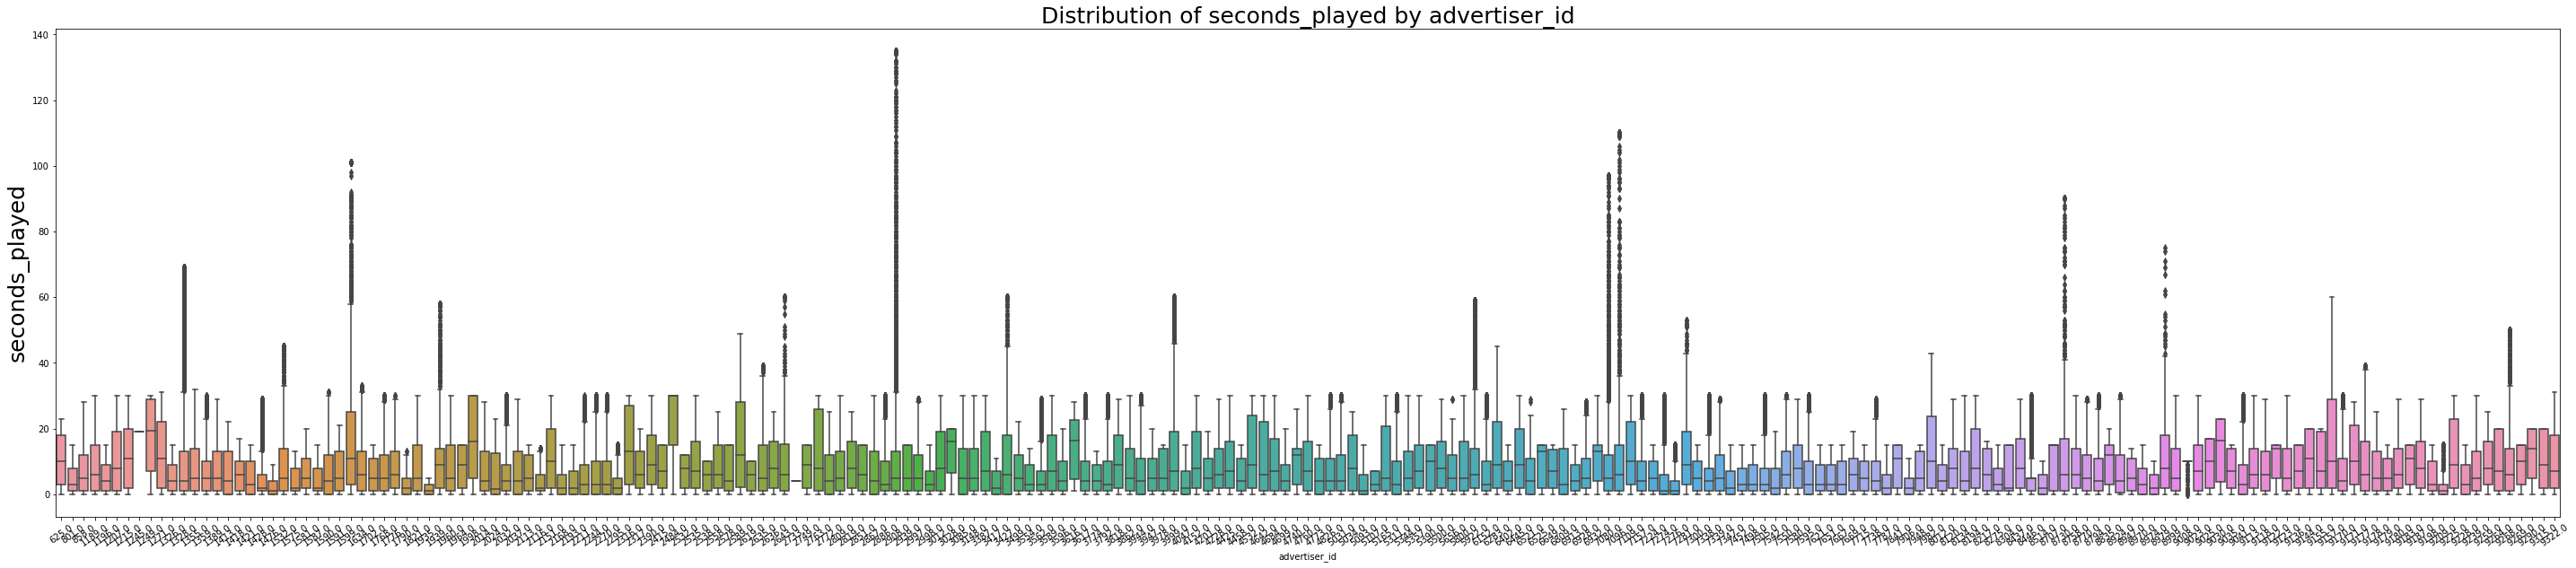

In [15]:
grouped = train_data.groupby('advertiser_id')['seconds_played']
fig, ax = plt.subplots(figsize=(50, 10))
ax = sns.boxplot(x='advertiser_id', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by advertiser_id',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=10)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

## Placement ID

Text(0,0.5,'count')

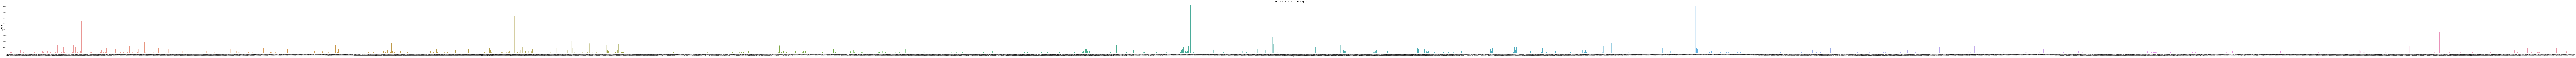

In [16]:
fig, ax = plt.subplots(figsize=(500, 10))
ax = sns.countplot(x="placement_id", data=train_data, orient="v")
ax.set_title('Distribution of placement_id',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=10)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

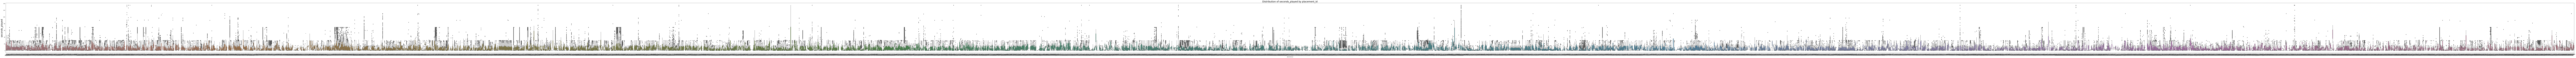

In [17]:
grouped = train_data.groupby('placement_id')['seconds_played']
fig, ax = plt.subplots(figsize=(500, 10))
ax = sns.boxplot(x='placement_id', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by placement_id',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=10)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

### Placement language

Text(0,0.5,'count')

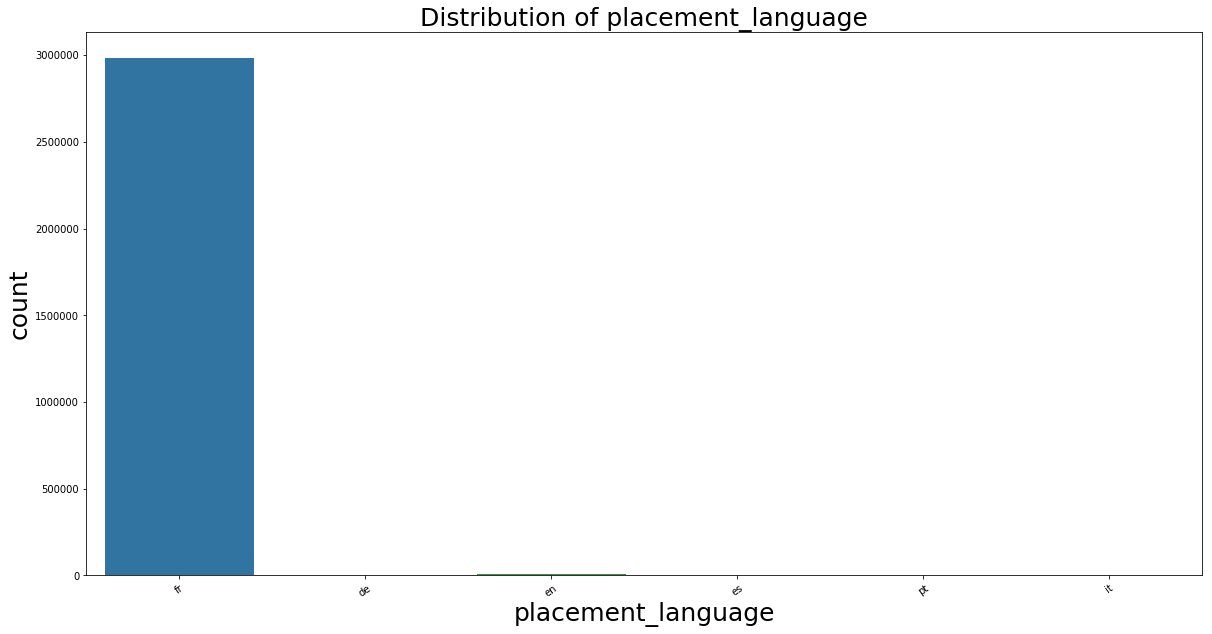

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(x="placement_language", data=train_data, orient="v")
ax.set_title('Distribution of placement_language',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

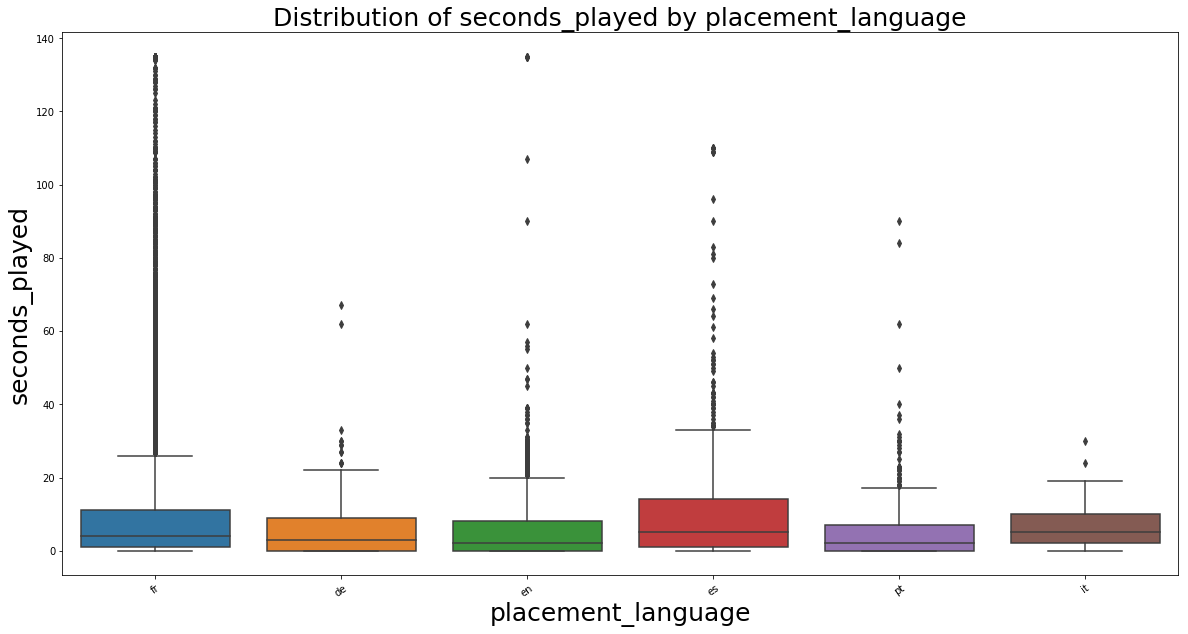

In [24]:
grouped = train_data.groupby('placement_language')['seconds_played']
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x='placement_language', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by placement_language',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

### Ua country

Text(0,0.5,'count')

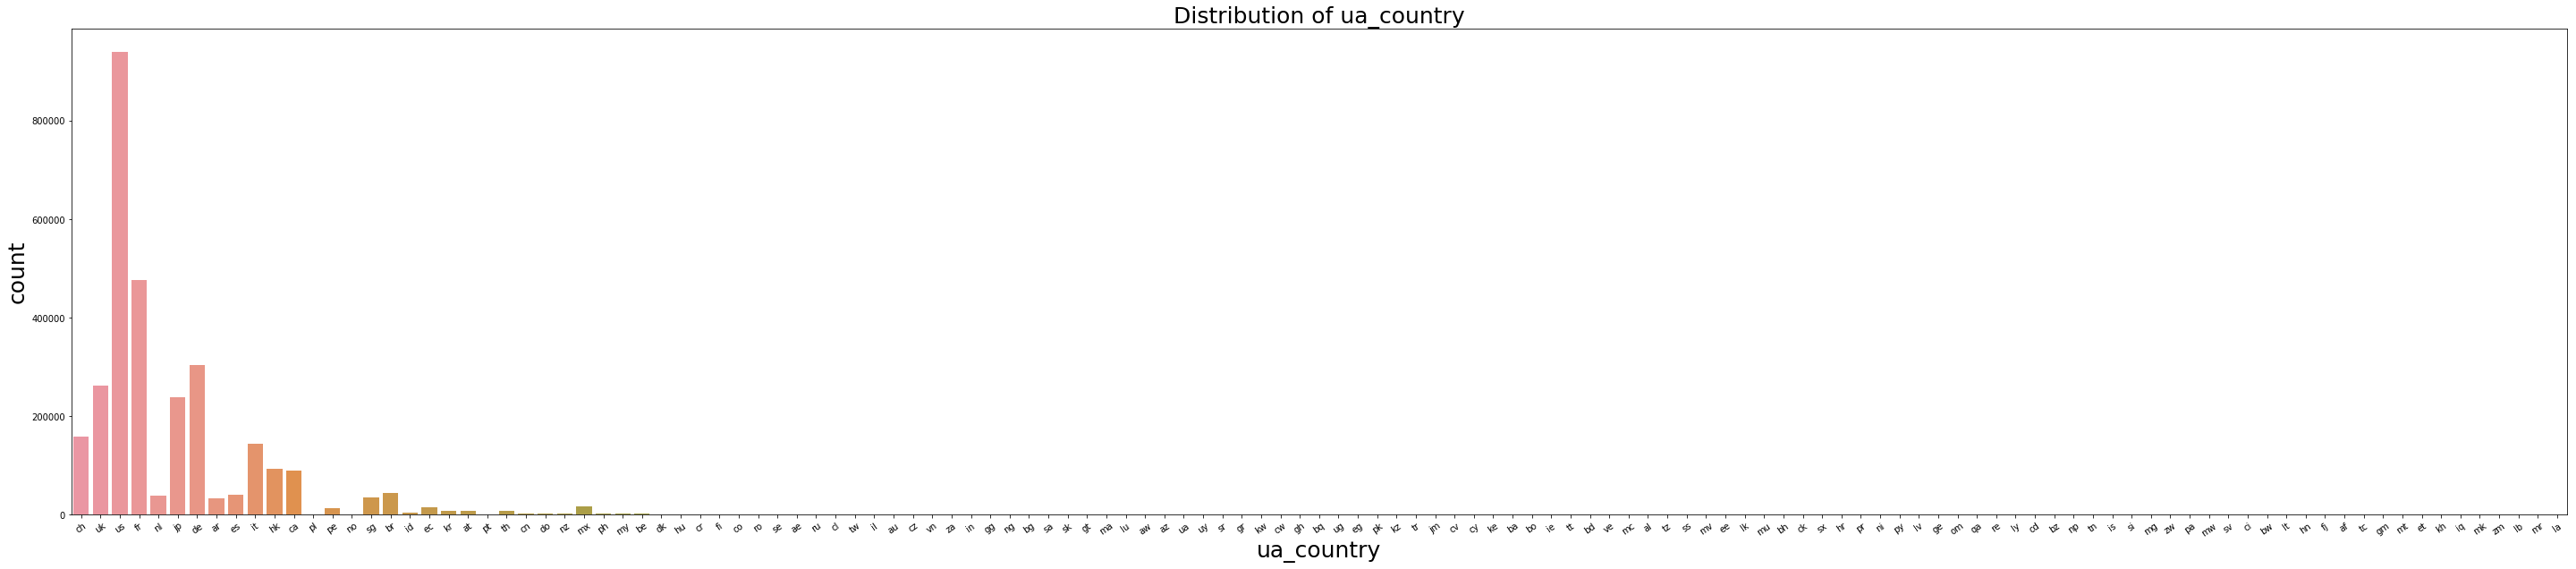

In [25]:
fig, ax = plt.subplots(figsize=(50, 10))
ax = sns.countplot(x="ua_country", data=train_data, orient="v")
ax.set_title('Distribution of ua_country',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

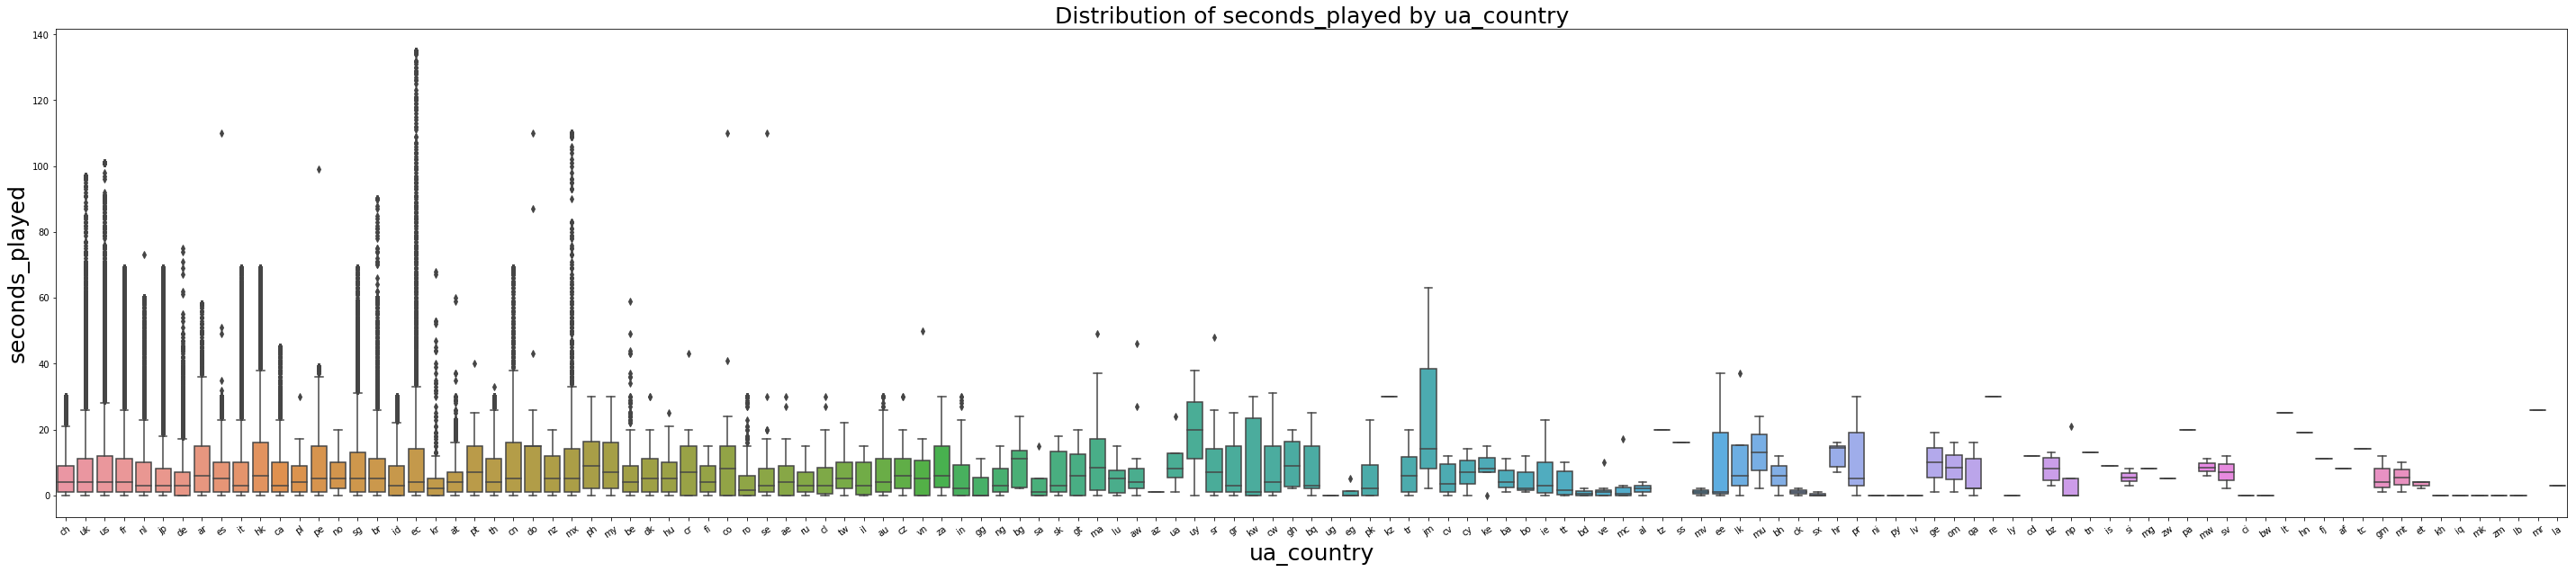

In [28]:
grouped = train_data.groupby('ua_country')['seconds_played']
fig, ax = plt.subplots(figsize=(50, 10))
ax = sns.boxplot(x='ua_country', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by ua_country',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

### Ua os

Text(0,0.5,'count')

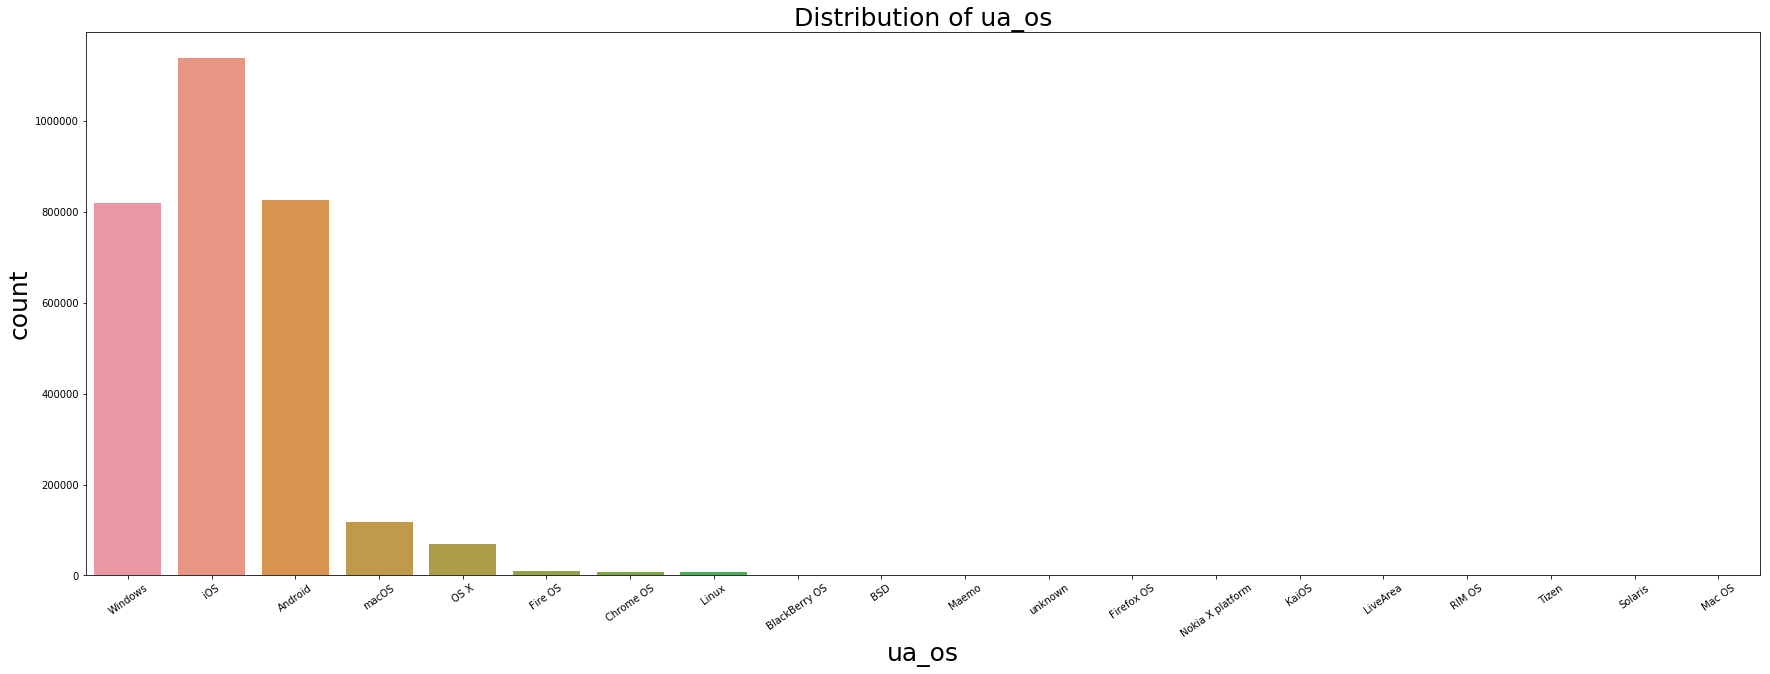

In [30]:
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.countplot(x="ua_os", data=train_data, orient="v")
ax.set_title('Distribution of ua_os',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

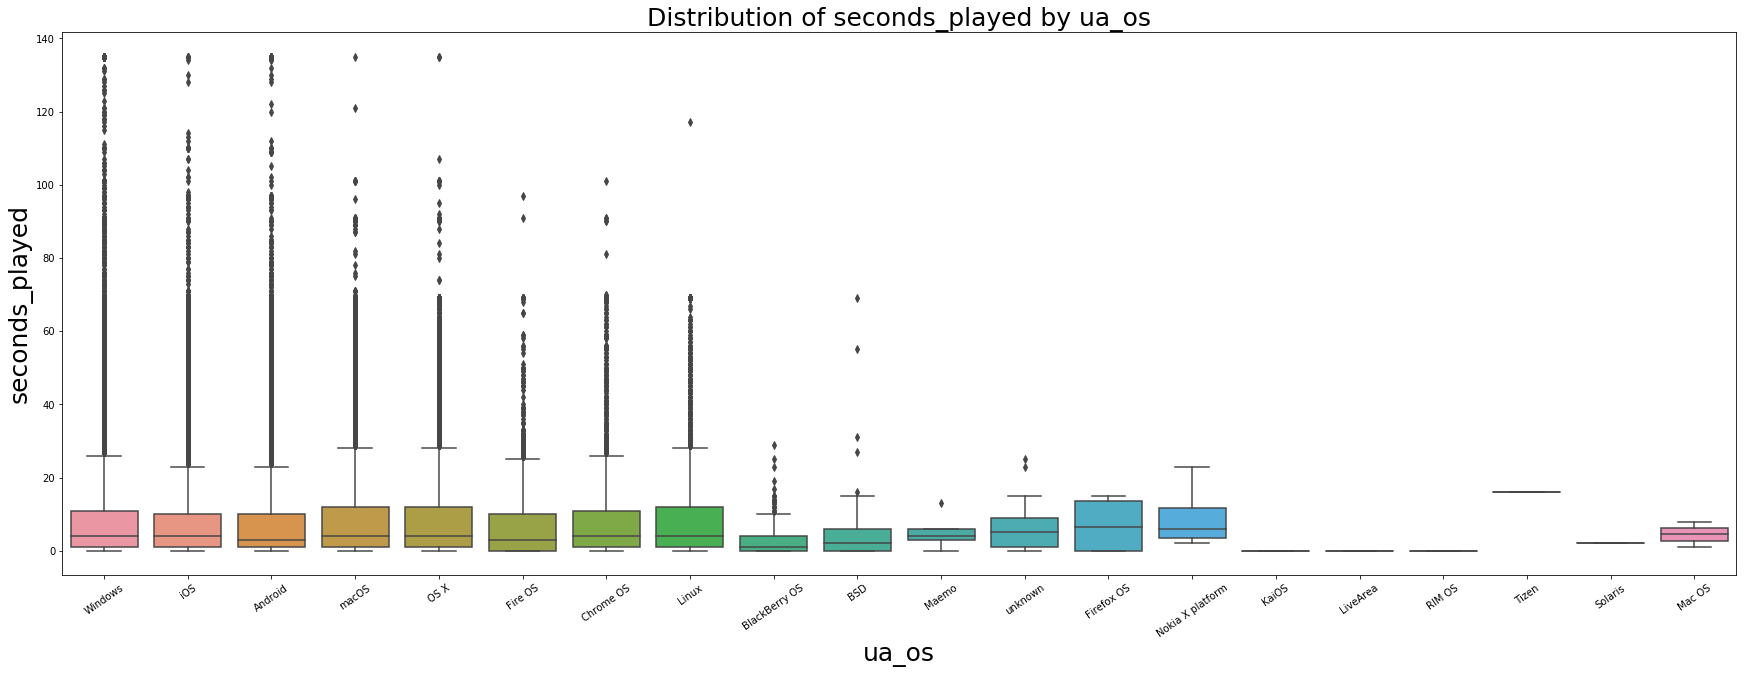

In [31]:
grouped = train_data.groupby('ua_os')['seconds_played']
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.boxplot(x='ua_os', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by ua_os',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

### Ua browser

Text(0,0.5,'count')

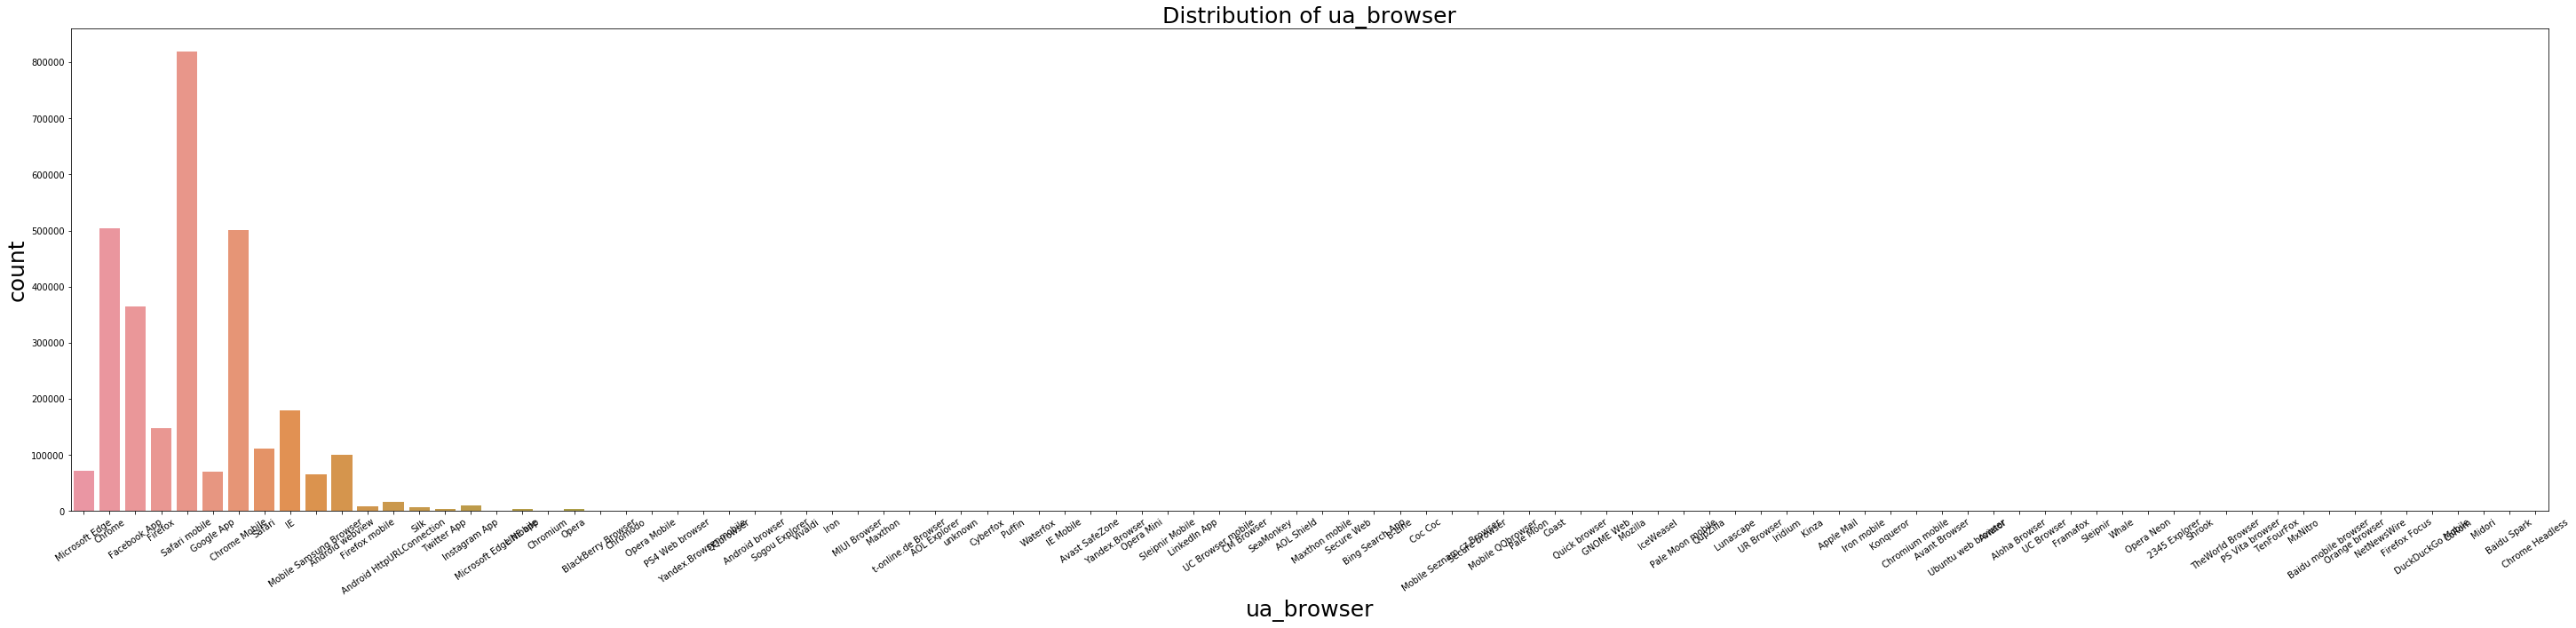

In [32]:
fig, ax = plt.subplots(figsize=(50, 10))
ax = sns.countplot(x="ua_browser", data=train_data, orient="v")
ax.set_title('Distribution of ua_browser',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

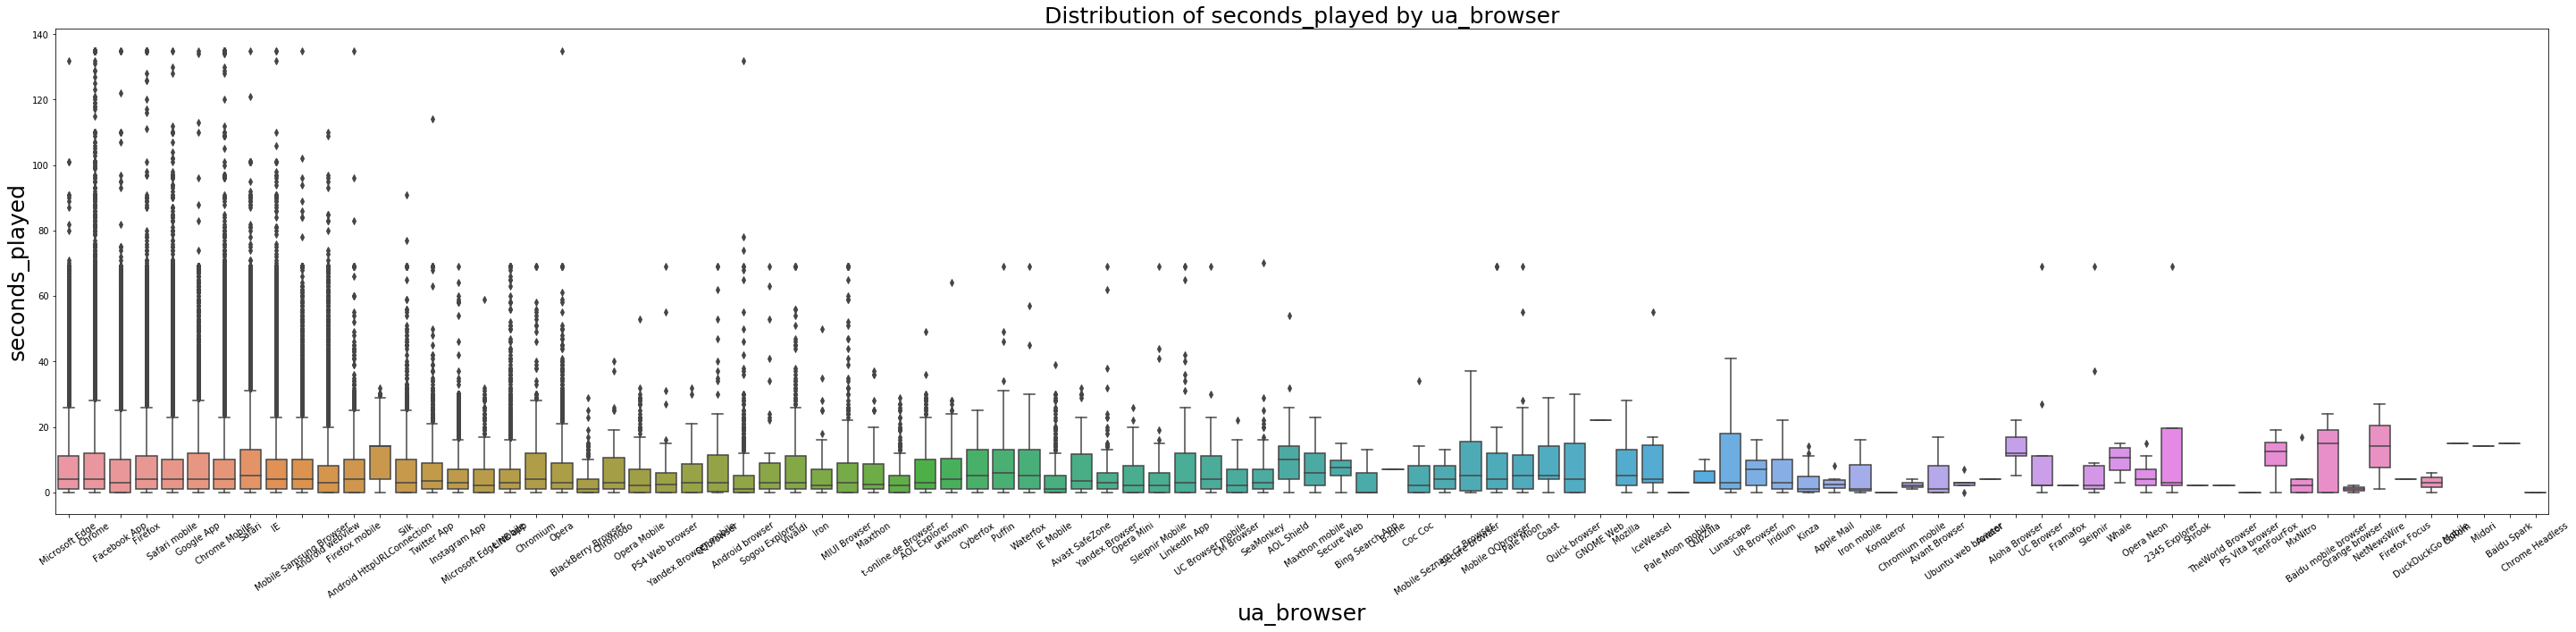

In [33]:
grouped = train_data.groupby('ua_browser')['seconds_played']
fig, ax = plt.subplots(figsize=(50, 10))
ax = sns.boxplot(x='ua_browser', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by ua_browser',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

### Ua device

Text(0,0.5,'count')

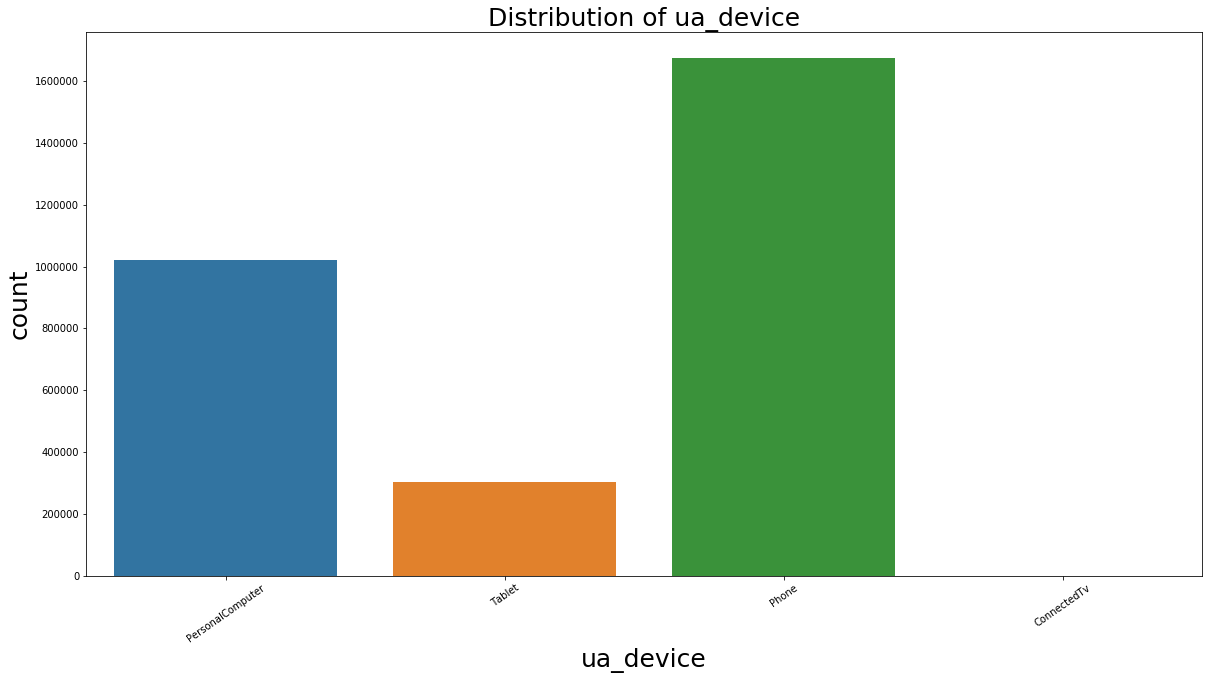

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(x="ua_device", data=train_data, orient="v")
ax.set_title('Distribution of ua_device',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

Text(0,0.5,'seconds_played')

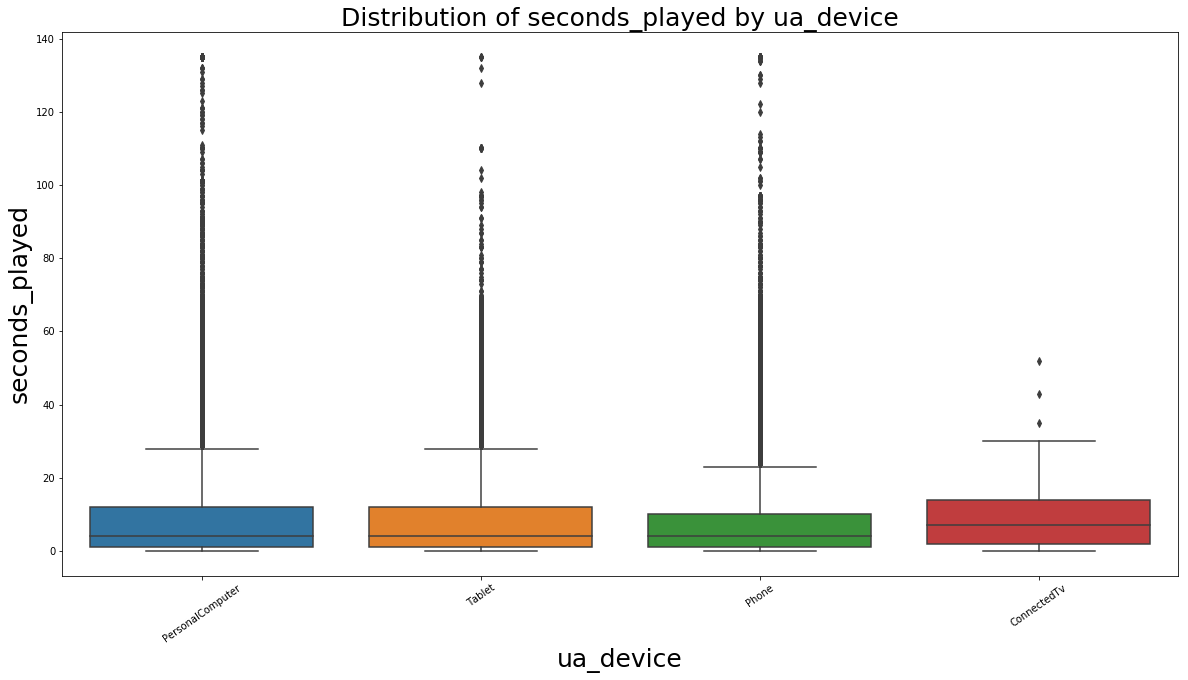

In [35]:
grouped = train_data.groupby('ua_device')['seconds_played']
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x='ua_device', y='seconds_played', data=train_data)
ax.set_title('Distribution of seconds_played by ua_device',fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 35)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
ax.set_ylabel(ax.get_ylabel(), fontsize=25)

### User average seconds played

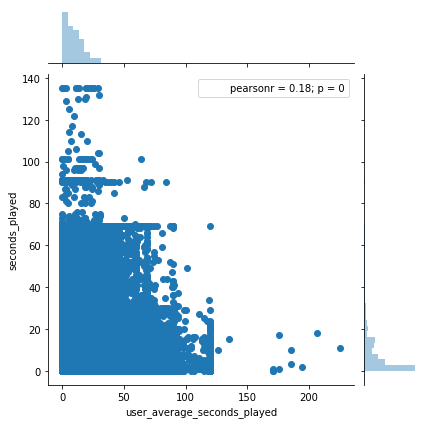

In [42]:
sns.jointplot(x='user_average_seconds_played', y='seconds_played', data=train_data)